<a href="https://colab.research.google.com/github/shebosh/Twitter-Sentiment-Analysis-HCI-584/blob/main/Twitter_sentiment_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run with a batch on cities
cities = ["Houston", "Chicago"] 
keyword = "Abortion"


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.1 MB/s 
     |████████████████████████████████| 6.6 MB 27.3 MB/s 
     |████████████████████████████████| 101 kB 3.6 MB/s 
     |████████████████████████████████| 596 kB 21.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# New Section

In [ ]:
def run_sentiment_analyzer(data, tokenizer, model):
    # Run for Roberta Model
    encoded_text = tokenizer(data, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Abortion_Chicago.csv to Abortion_Chicago.csv
Saving Abortion_Houston.csv to Abortion_Houston.csv


In [ ]:
keyword = "Abortion"
cities = ["Houston", "Chicago"] 


import pandas as pd

# columns for making the data frame later, start with empty list = no rows
data = {"neg":[], "neu":[], "pos":[]}

for city in cities:
    filename = keyword + "_" + city + ".csv"
    df = pd.read_csv(filename)
    text = str(df["text"].values)
    res_dict = run_sentiment_analyzer(text, tokenizer, model)
    
    # append a row of sentiment values to the columns dict 
    data["neg"].append(res_dict["roberta_neg"])
    data["neu"].append(res_dict["roberta_neu"])
    data["pos"].append(res_dict["roberta_pos"])
    

df = pd.DataFrame(data=data, index=cities)
df  # you could save this as csv ....

,neg,neu,pos
Houston,0.836879,0.152672,0.010449
Chicago,0.850779,0.138953,0.010269


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


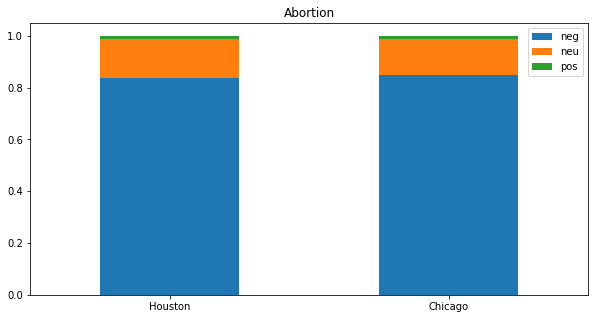

In [ ]:
df.plot.bar(stacked=True,rot=0, title=keyword, figsize=(10,5));

# New Section

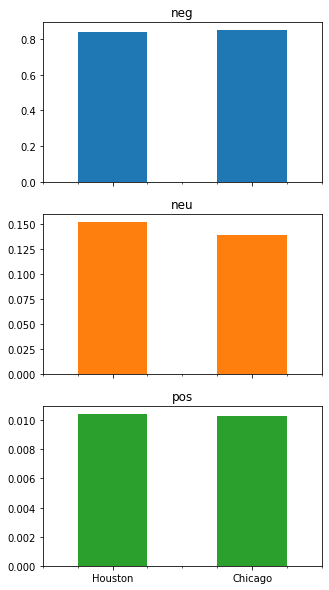

In [ ]:
df.plot.bar(rot=0, subplots=True, figsize=(5, 10), legend=False);

Version that does many different analysis runs and averaging the results. This takes much longer but is I think substantially better than the all on long strings results

In [ ]:
keyword = "Abortion"


import pandas as pd

# columns for making the data frame later, start with empty list = no rows
data = {"neg":[], "neu":[], "pos":[]}

for city in cities:
    filename = keyword + "_" + city + ".csv"
    df = pd.read_csv(filename)
    text_lst = list(df["text"].values)
    n = 0
    neg = neu = pos = 0

    print(city, len(text_lst))
    for text in text_lst:
        res_dict = run_sentiment_analyzer(text, tokenizer, model)
        n += 1
        neg += res_dict["roberta_neg"]
        neu += res_dict["roberta_neu"]
        pos += res_dict["roberta_pos"]

        if n % 100 == 0:
          print(n, round(neg/n,2), round(neu/n, 2), round(pos/n, 2))

    
    # append a row of sentiment values to the columns dict 
    data["neg"].append(neg/n)
    data["neu"].append(neu/n)
    data["pos"].append(pos/n)
    

df = pd.DataFrame(data=data, index=cities)
df  # you could save this as csv ....

Houston 6021
100 0.64 0.29 0.07
200 0.63 0.3 0.07
300 0.63 0.31 0.06
400 0.6 0.33 0.07
500 0.61 0.33 0.06
600 0.61 0.33 0.06
700 0.62 0.32 0.06
800 0.63 0.32 0.06
900 0.62 0.32 0.06
1000 0.62 0.32 0.06
1100 0.62 0.32 0.06
1200 0.62 0.32 0.06
1300 0.62 0.32 0.06
1400 0.62 0.32 0.06
1500 0.62 0.32 0.06
1600 0.62 0.32 0.06
1700 0.62 0.32 0.06
1800 0.62 0.32 0.06
1900 0.63 0.32 0.06
2000 0.63 0.31 0.06
2100 0.63 0.31 0.06
2200 0.63 0.31 0.06
2300 0.63 0.31 0.06
2400 0.63 0.31 0.06
2500 0.63 0.31 0.06
2600 0.63 0.31 0.06
2700 0.63 0.31 0.06
2800 0.63 0.31 0.06
2900 0.63 0.31 0.06
3000 0.63 0.31 0.06
3100 0.63 0.31 0.06
3200 0.63 0.3 0.06
3300 0.64 0.3 0.06
3400 0.64 0.3 0.06
3500 0.64 0.3 0.06
3600 0.64 0.3 0.06
3700 0.64 0.3 0.06
3800 0.64 0.3 0.06
3900 0.64 0.3 0.06
4000 0.64 0.3 0.06
4100 0.64 0.3 0.06
4200 0.64 0.3 0.06
4300 0.64 0.3 0.06
4400 0.64 0.3 0.06
4500 0.64 0.3 0.06
4600 0.64 0.3 0.06
4700 0.64 0.3 0.06
4800 0.64 0.3 0.06
4900 0.64 0.3 0.06
5000 0.64 0.3 0.06
5100 0.64 0.3 0.0

In [20]:
df.plot.bar(rot=0, subplots=True, figsize=(5, 10), legend=False);

TypeError: ignored